In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime

In [5]:
%matplotlib inline

In [7]:
columns = ['user_id', 'order_dt', 'quantity', 'total']
df = pd.read_table('CDNOW.txt', names=columns, sep='\s+')

C:\Users\12638\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [11]:
#通过head()查看前5行数据
df.head()

,user_id,order_dt,quantity,total
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [12]:
#通过info()查看整体情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id     69659 non-null int64
order_dt    69659 non-null int64
quantity    69659 non-null int64
total       69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [13]:
#通过describe()观察描述性统计：
df.describe()

,user_id,order_dt,quantity,total
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [14]:
#pd.to_datetime将特定的字符串或者数字转换成时间格式
df['order_date'] = pd.to_datetime(df.order_dt, format = '%Y%m%d')
df['month'] = df.order_date.astype('datetime64[M]')

In [15]:
df.head()

,user_id,order_dt,quantity,total,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [18]:
#查看每个用户的订单
df.groupby('user_id').sum()

,order_dt,quantity,total
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61
6,19970101,1,20.99
7,59921434,18,264.67
8,159775420,18,197.66
9,59921222,6,95.85


In [19]:
df.groupby('user_id').sum().describe()

,order_dt,quantity,total
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


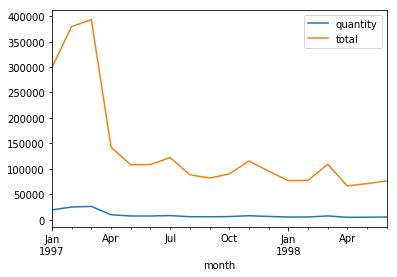

In [25]:
#通过month来进行透视
df.groupby('month')[['quantity', 'total']].sum()
df.groupby('month')[['quantity', 'total']].sum().plot()

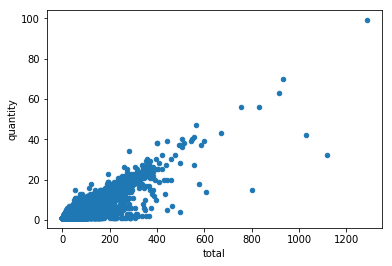

In [27]:
#绘制每笔订单的散点图
df.plot.scatter(x = 'total', y = 'quantity')

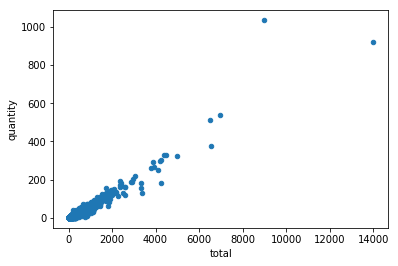

In [28]:
#绘制每个用户的散点图
df.groupby('user_id').sum().plot.scatter(x = 'total', y = 'quantity')

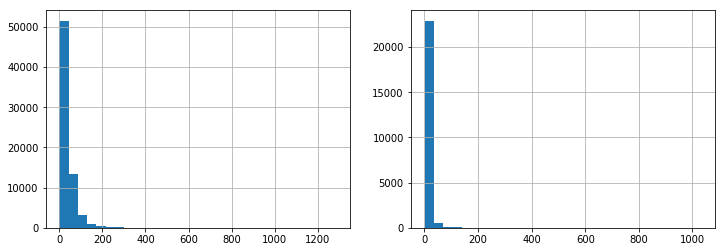

In [31]:
plt.figure(figsize = (12,4))
plt.subplot(121)
df.total.hist(bins = 30)
plt.subplot(122)
df.groupby('user_id').quantity.sum().hist(bins = 30)

In [32]:
#用户首次消费月份
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [33]:
#用户最后消费月份
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [34]:
order_date_min = df.groupby("user_id")['order_date'].min()
order_date_max = df.groupby("user_id")['order_date'].max()

(order_date_max-order_date_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_date, dtype: timedelta64[ns]

In [35]:
(order_date_max-order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

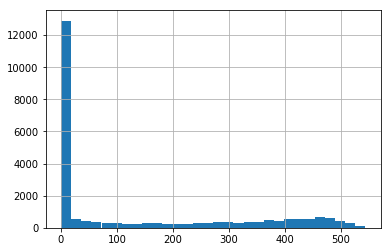

In [38]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=30)

In [39]:
pivoted_counts = df.pivot_table(index = 'user_id', columns = 'month',
                               values = 'order_dt', aggfunc = 'count').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


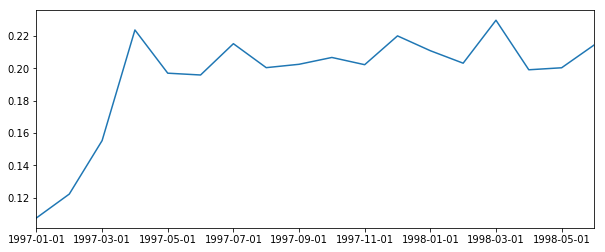

In [42]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))

In [44]:
pivoted_amount = df.pivot_table(index = 'user_id', columns = 'month',
                               values = 'total', aggfunc = 'mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [45]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [46]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status
from pandas import DataFrame
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = df.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = columns_month, index = user_id)
#Series转化为Dataframe的方法：先转化为list类型，再转化为DataFrame，期间可传入columns
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


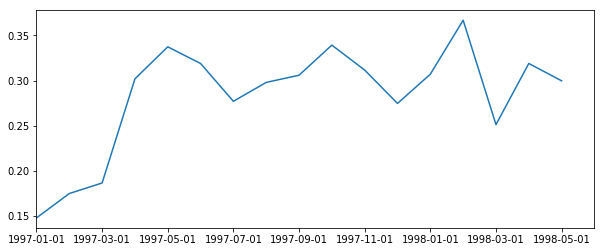

In [47]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

In [54]:
user_purchase_retention = pd.merge(left = df, right = order_date_min.reset_index(),
                                   how = 'inner', on = 'user_id',
                                   suffixes = ('', '_min')
                                  )
user_purchase_retention.head()


,user_id,order_dt,quantity,total,order_date,month,order_date_min
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02


In [55]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date-user_purchase_retention.order_date_min
#将日期转化为时间
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) #日期转换为时间
user_purchase_retention.head()


,user_id,order_dt,quantity,total,order_date,month,order_date_min,order_date_diff,date_diff
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01,0 days,0.0
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02,0 days,0.0
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02,87 days,87.0


In [56]:
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(10)

,user_id,order_dt,quantity,total,order_date,month,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02,0 days,0.0,NaN
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,19970402,2,19.54,1997-04-02,1997-04-01,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,19971115,5,57.45,1997-11-15,1997-11-01,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,19971125,4,20.96,1997-11-25,1997-11-01,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,19980528,1,16.99,1998-05-28,1998-05-01,1997-01-02,511 days,511.0,NaN
9,4,19970101,2,29.33,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN


In [57]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id', columns = 'date_diff_bin',
                                                       values = 'total', aggfunc = sum, dropna = False)
pivoted_retention.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                 NaN     NaN      NaN       NaN       NaN       NaN   
2                 NaN     NaN      NaN       NaN       NaN       NaN   
3                 NaN     NaN      NaN       NaN       NaN      40.3   
4                 NaN     NaN      NaN     29.73       NaN       NaN   
5                 NaN     NaN    13.97       NaN      38.9       NaN   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                    NaN         NaN  
2                    NaN         NaN  
3                    NaN       78.41  
4                    NaN       41.44  
5                  110.4      155.54  

In [58]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [59]:

pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                   0       0        0         0         0         0   
2                   0       0        0         0         0         0   
3                   0       0        0         0         0         1   
4                   0       0        0         1         0         0   
5                   0       0        1         0         1         0   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                      0           0  
2                      0           0  
3                      0           1  
4                      0           1  
5                      1           1  

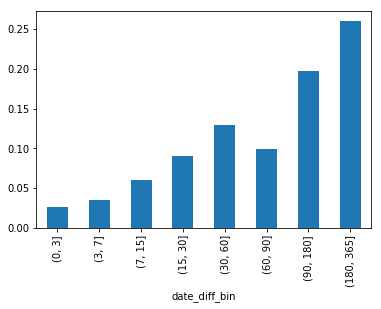

In [60]:
pivoted_retention_trans.mean().plot.bar()

In [61]:
#计算用户的消费间隔
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    #shift(-1)是向下便宜一个位置；shift()是向上偏移一个位置；加参数axis=1则是左右偏移
    return d
last_diff = user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head(10).reset_index()


,user_id,level_1,date_diff
0,1,0,NaN
1,2,1,0.0
2,2,2,NaN
3,3,3,-87.0
4,3,4,-3.0
5,3,5,-227.0
6,3,6,-10.0
7,3,7,-184.0
8,3,8,NaN
9,4,9,-17.0
